In [1]:
using Distributions
using Printf
using Random
Random.seed!(4649373)
using StaticArrays
using StatsBase
using StatsPlots
default(fmt = :png, titlefontsize=10, size = (400, 250))

In [2]:
function chisqstat(x, n, p)
    sum((x[i] - n*p[i])^2/(n*p[i]) for i in eachindex(p))
end

pval(r, chi2) = ccdf(Chisq(r - 1), chi2)
pval(x, n, p) = pval(length(p), chisqstat(x, n, p))

function mcsim(n, p₀, p = p₀; L = 10^6)
    dist_true = Multinomial(n, p₀)
    C = Vector{Float64}(undef, L)
    P = similar(C)
    r = length(p₀)
    tmp = [Vector{Int}(undef, r) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist_true, tmp[Threads.threadid()])
        C[i] = chisqstat(X, n, p)
        P[i] = pval(r, C[i])
    end
    ecdfC, ecdfP = ecdf(C), ecdf(P)
    C, P, ecdfC, ecdfP
end

function plot_mcsim(n, p₀, p = p₀; L = 10^6)
    r = length(p₀)
    C, P, ecdfC, ecdfP = mcsim(n, p₀, p; L)
    
    P1 = plot(; legend = :bottomright)
    plot!(x -> ecdfC(x), 0, r+4√(2r); label="ecdf(χ²-stats)")
    plot!(x -> cdf(Chisq(5), x); label="cdf(Chisq(5))")

    P2 = plot(; legend = :bottomright)
    plot!(x -> ecdfP(x), 0, 0.1; label="ecdf(p-values)")
    plot!(x -> cdf(Uniform(), x); label="cdf(Uniform())")
    
    @show n p₀ p
    plot(P1, P2; size=(600, 250))
end

oddevenprob(t) = SVector((1-t)/3, t/3, (1-t)/3, t/3, (1-t)/3, t/3)

oddevenprob (generic function with 1 method)

n = 10
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]
p = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


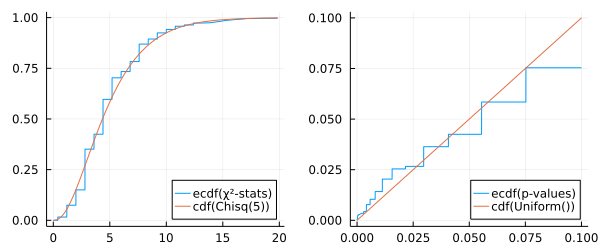

In [3]:
plot_mcsim(10, oddevenprob(0.75))

n = 20
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]
p = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


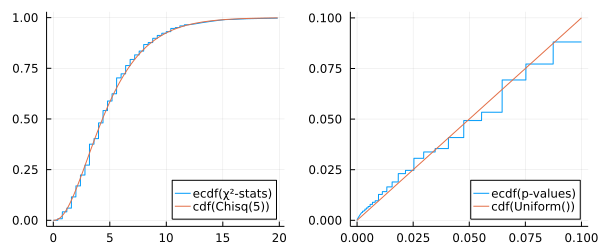

In [4]:
plot_mcsim(20, oddevenprob(0.75))

n = 30
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]
p = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


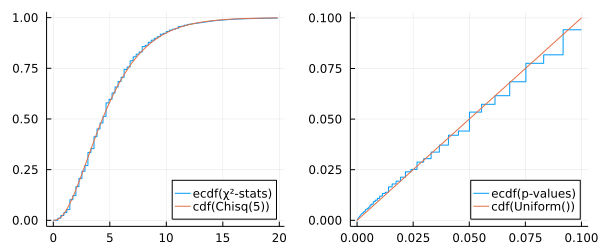

In [5]:
plot_mcsim(30, oddevenprob(0.75))

In [6]:
function plot_pvaluefunction!(x; kwargs...)
    n = sum(x)
    f(t) = pval(x, n, oddevenprob(t))
    plot!(f, 0, 1; label="", kwargs...)
end

function plot_pvaluefunctions(n, p₀; L=100)
    @show n
    @show p₀
    dist_true = Multinomial(n, p₀)
    plot(; xtick=0:0.1:1, ytick=0:0.1:1)
    for _ in 1:L
        plot_pvaluefunction!(rand(dist_true); alpha=0.4, lw=0.5)
    end
    title!("p-value functions (n = $n)")
end

plot_pvaluefunctions (generic function with 1 method)

n = 10
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


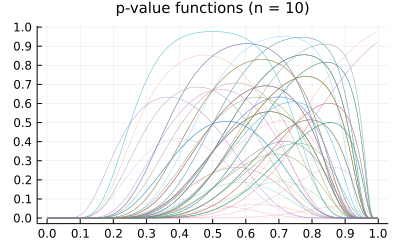

In [7]:
plot_pvaluefunctions(10, oddevenprob(0.75))

n = 20
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


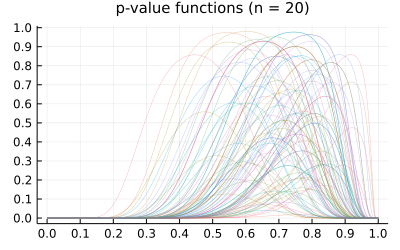

In [8]:
plot_pvaluefunctions(20, oddevenprob(0.75))

n = 30
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


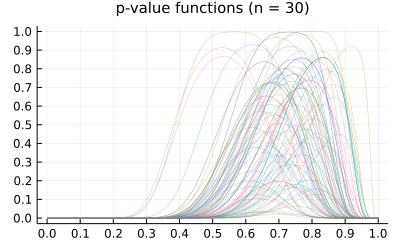

In [9]:
plot_pvaluefunctions(30, oddevenprob(0.75))

n = 100
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


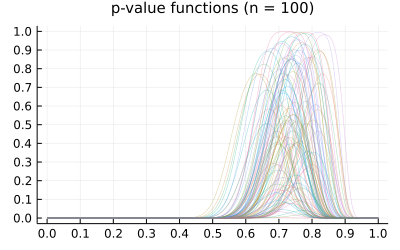

In [10]:
plot_pvaluefunctions(100, oddevenprob(0.75))

n = 400
p₀ = [0.08333333333333333, 0.25, 0.08333333333333333, 0.25, 0.08333333333333333, 0.25]


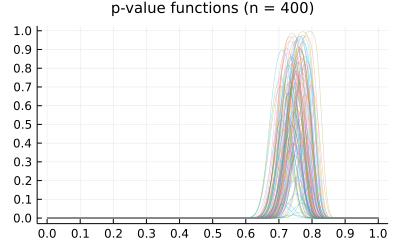

In [11]:
plot_pvaluefunctions(400, oddevenprob(0.75))